<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/Linear%20Regression/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

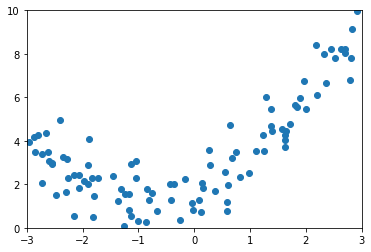

In [ ]:
plt.scatter(X, y)
plt.axis([-3, 3, 0, 10])
plt.show()

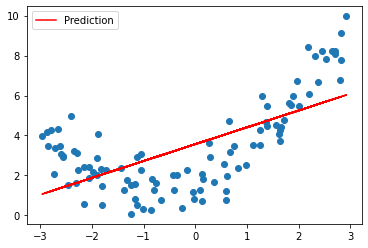

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, "r-", label = "Prediction")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print("X: ", X[0])
print("X_poly: ", X_poly[0])

X:  [-0.75275929]
X_poly:  [-0.75275929  0.56664654]


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("Intercept: ", lin_reg.intercept_)
print("Slope: ", lin_reg.coef_)

Intercept:  [1.78134581]
Slope:  [[0.93366893 0.56456263]]


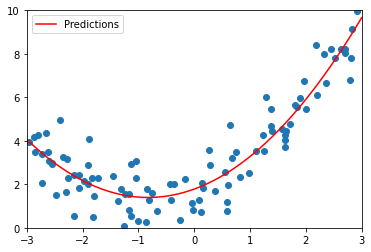

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y)
plt.plot(X_new, y_new, "r-", label="Predictions")

plt.legend()
plt.axis([-3, 3, 0, 10])
plt.show()

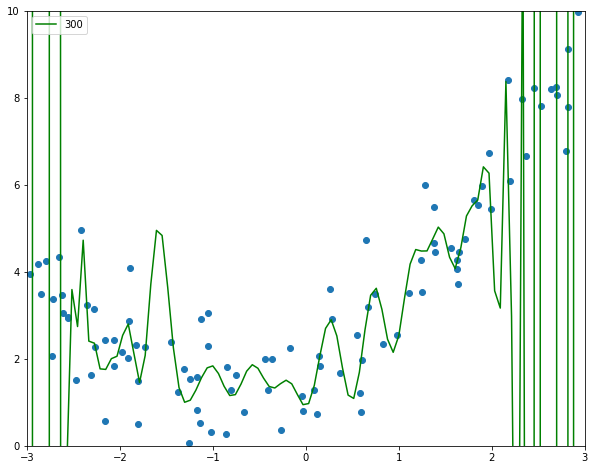

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

polybig_features = PolynomialFeatures(degree=300, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)

plt.figure(figsize=(10, 8))
plt.plot(X_new, y_newbig, "g-", label = str(300))

plt.scatter(X, y)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

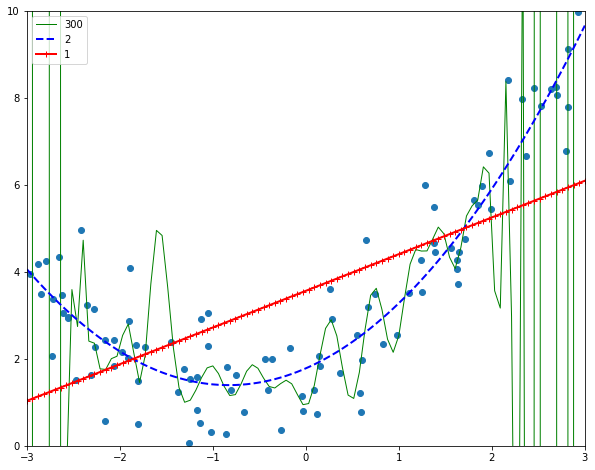

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
plt.figure(figsize=(10, 8))

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(X, y)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

# Regularized Linear Models

# Ridge Regression

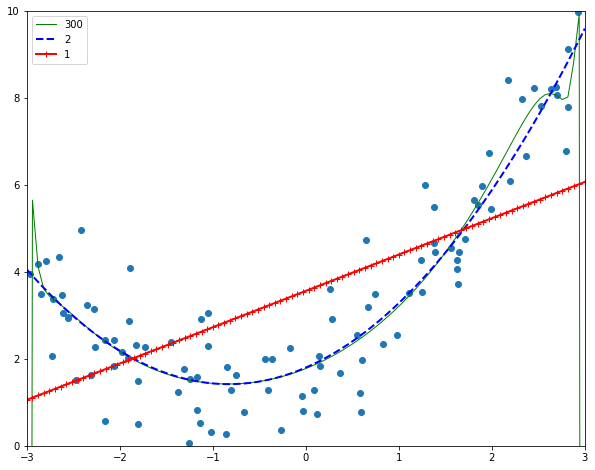

In [ ]:
from sklearn.linear_model import Ridge

plt.figure(figsize=(10, 8))

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    ridge_reg = Ridge(alpha=1)

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("ridge_reg", ridge_reg),
        ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(X, y)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

# Lasso

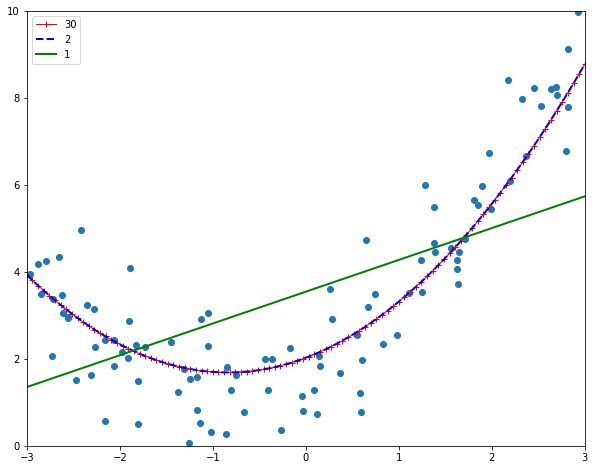

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10, 8))

for style, width, degree in (("r-+", 1, 30), ("b--", 2, 2), ("g-", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lasso_reg = Lasso(alpha=0.2)

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lasso_reg", lasso_reg),
        ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(X, y)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

# Elastic

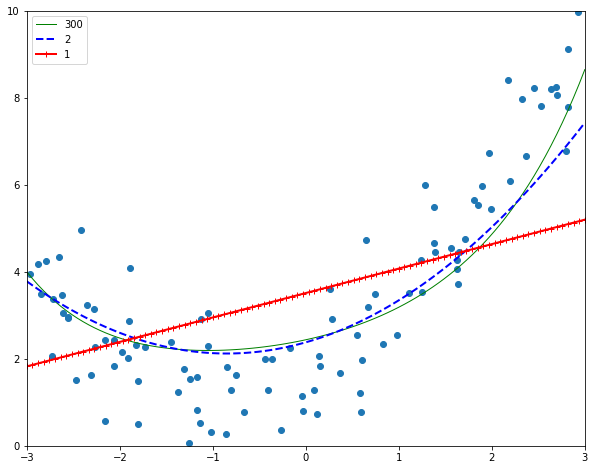

In [ ]:
from sklearn.linear_model import ElasticNet

plt.figure(figsize=(10, 8))

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lasso_reg = ElasticNet(alpha=0.5)

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lasso_reg", lasso_reg),
        ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(X, y)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()